In [1]:
import os
import sys

# Get the current working directory
cwd = os.getcwd()

# Add the path to the electre_tree module to the Python path
sys.path.append(os.path.join(cwd, 'ELECTRE_Tree'))

from electre_tree import tree_e_tri_b , util_e_tri_b


In [2]:
# Required Libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv('/project/grouped_public.csv')
df.head(3)

,geometry,Public WiFi,number of bikes,Mean Inhabitants,Employment,Crime Degree,school_count,Flooding,hospitals_count,Income,...,Collision,Run over,Metro,Suburban Train,Metrobus,Trolleybus,RTP,Concessioned,e-bike,Total coverage of transport
0,"POLYGON ((471959.4893475254 2136241.824392597,...",4.0,0.0,1.194917,1.0,5.0,4.0,1.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
1,POLYGON ((482157.89084256295 2132902.396538757...,9.0,0.0,0.534557,1.0,2.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.666667,0.0,0.0,0.666667,0.0,1.333333
2,POLYGON ((479437.4576426303 2141530.5071101547...,6.0,0.0,0.576814,1.0,2.0,4.0,1.5,4.0,0.0,...,0.0,2.0,0.0,0.0,0.000000,0.0,0.5,1.000000,0.0,1.500000


In [4]:
df.columns

Index(['geometry', 'Public WiFi', 'number of bikes', 'Mean Inhabitants',
       'Employment', 'Crime Degree', 'school_count', 'Flooding',
       'hospitals_count', 'Income', 'Deaths', 'Injuries', 'Collision',
       'Run over', 'Metro', 'Suburban Train', 'Metrobus', 'Trolleybus', 'RTP',
       'Concessioned', 'e-bike', 'Total coverage of transport'],
      dtype='object')

In [5]:
df= df.drop(['geometry'], axis=1)

In [6]:
# Set numerical columns
df_columns_to_normalize = [
 'Public WiFi','number of bikes','Mean Inhabitants','school_count', 'Flooding',
    'hospitals_count', 'Income','Employment','Crime Degree','Deaths','Injuries',
    'Run over','Collision','Metro', 'Suburban Train', 'Concessioned','Metrobus','Trolleybus',
    'RTP','e-bike','Total coverage of transport']

n_scaler = MinMaxScaler()

# Create a copy of DataFrame
df_normalized = df.copy()

df_normalized[df_columns_to_normalize] = n_scaler.fit_transform(df_normalized[df_columns_to_normalize])

In [7]:
# Reverse the scale of the minimization criteria by subtracting from 1
minimization_criteria = ['Mean Inhabitants','Crime Degree','Deaths', 'Injuries', 'Run over',
                        'Flooding','Collision']

df_normalized[minimization_criteria] = 1 - df_normalized[minimization_criteria]

In [8]:
df_normalized.to_csv('public_grouped.csv')

In [8]:
# Convert to array format

arr = df_normalized.values
arr

array([[0.01061008, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02387268, 0.        , 0.68117297, ..., 0.66666667, 0.        ,
        0.22222222],
       [0.01591512, 0.        , 0.63758364, ..., 1.        , 0.        ,
        0.25      ],
       ...,
       [0.09018568, 0.        , 0.3995047 , ..., 0.8       , 0.        ,
        0.41666667],
       [0.0530504 , 0.        , 0.2584067 , ..., 1.        , 0.        ,
        0.25      ],
       [0.01856764, 0.        , 0.43608451, ..., 1.        , 0.        ,
        0.41666667]])

In [112]:
# Parameters - ELECTRE Tree
rule      = 'pc'
classes   = 3
target    = []
Q         = []
P         = []
V         = []
W         = []
B         = []
models    = 10
models2   = 100

# Parameters - GA
elite       = 20
eta         = 3
mu          = 6
size        = 30
rate        = 0.01
generations = 150
samples     = 0.25

In [104]:
# Train Model
models = tree_e_tri_b.tree_electre_tri_b(arr, 
                                         target_assignment = target, 
                                         W = W, 
                                         Q = Q, 
                                         P = P, 
                                         V = V, 
                                         B = B, 
                                         rule = rule, 
                                         number_of_classes = classes, 
                                         elite = elite, 
                                         eta = eta, 
                                         mu = mu, 
                                         mutation_rate = rate, 
                                         generations = generations, 
                                         samples = samples, 
                                         number_of_models = models)

Model # 1
Model # 2
Model # 3
Model # 4
Model # 5
Model # 6
Model # 7
Model # 8
Model # 9
Model # 10


In [105]:
# Predict
prediction, solutions = tree_e_tri_b.predict(models, arr, verbose = False, rule = 'pc')

The function plots the data using principal component analysis (PCA) when the data has more than two dimensions. 

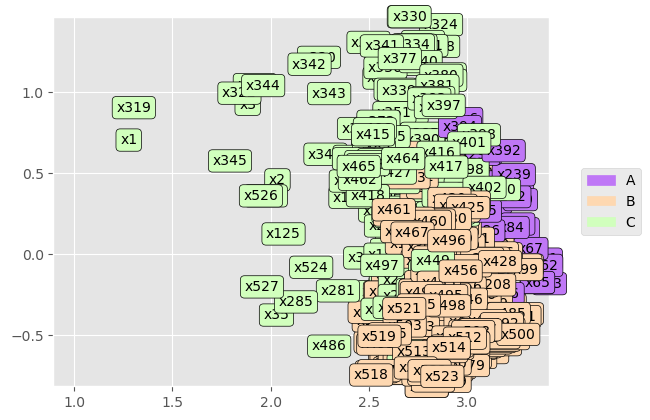

In [106]:
# Plot - Tree Model
util_e_tri_b.plot_points(arr, prediction)

In [107]:
from collections import Counter

# Classification 
counter = Counter(prediction)
for cls, count in counter.items():
    print(f'Class: {cls}, Number of Records: {count}')


Class: 2, Number of Records: 183
Class: 0, Number of Records: 41
Class: 1, Number of Records: 303


In [108]:
# Elicitated Paramneters
w_mean, w_std, q_mean, q_std, p_mean, p_std, v_mean, v_std, b_mean, b_std, cut_mean, cut_std, acc_mean, acc_std = tree_e_tri_b.metrics(models, number_of_classes = classes)

print('Criteria Weights: ', np.around(w_mean, decimals = 2))
print('Q: ', np.around(q_mean, decimals = 2))
print('P: ', np.around(p_mean, decimals = 2))
print('V: ', np.around(v_mean, decimals = 2))
for i in range(0, len(b_mean)):
    print('b'+str(i+1)+': ', np.around(b_mean[i], decimals = 2))
    print('Lambda Cutoff: ', round(cut_mean,  2))
    print('Accuracy: ',      round(acc_mean,  2))

Criteria Weights:  [0.42 0.31 0.61 0.6  0.64 0.63 0.33 0.39 0.74 0.33 0.68 0.65 0.76 0.7
 0.52 0.39 0.58 0.35 0.31 0.5  0.62]
Q:  [0.03 0.09 0.15 0.24 0.15 0.11 0.12 0.11 0.12 0.24 0.02 0.05 0.13 0.28
 0.21 0.05 0.11 0.33 0.26 0.12 0.13]
P:  [0.16 0.28 0.22 0.33 0.31 0.11 0.34 0.24 0.15 0.35 0.13 0.06 0.35 0.39
 0.24 0.06 0.17 0.39 0.39 0.41 0.19]
V:  [0.25 0.37 0.41 0.6  0.42 0.37 0.72 0.36 0.36 0.63 0.32 0.31 0.52 0.53
 0.67 0.18 0.52 0.6  0.48 0.58 0.26]
b1:  [0.06 0.58 0.37 0.42 0.42 0.08 0.39 0.26 0.07 0.68 0.61 0.84 0.36 0.48
 0.31 0.41 0.12 0.31 0.56 0.72 0.6 ]
Lambda Cutoff:  0.7
Accuracy:  0.57
b2:  [0.3  0.73 0.49 0.68 0.84 0.1  0.57 0.38 0.43 0.75 0.79 0.86 0.72 0.79
 0.51 0.72 0.43 0.65 0.8  0.77 0.71]
Lambda Cutoff:  0.7
Accuracy:  0.57


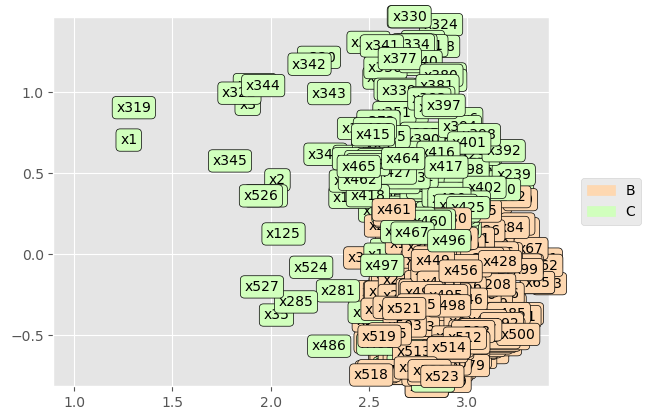

In [109]:
# Plot - Elicitated Parameters
e_tri = util_e_tri_b.electre_tri_b(arr, W = w_mean, Q = q_mean, P = p_mean, V = v_mean,
                                   B = b_mean, cut_level = cut_mean, verbose = False, rule = rule, graph = True) 

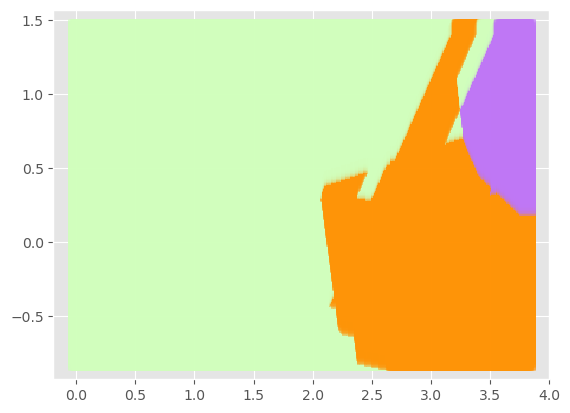

In [110]:
# Plot Tree Model - Decision Boundaries
tree_e_tri_b.plot_decision_boundaries(arr, models)  

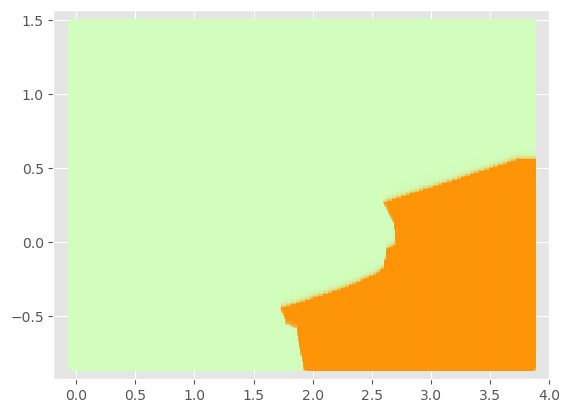

In [111]:
# Plot Mean Model - Decision Boundaries  
model_mean = []
model_mean.append([w_mean, acc_mean, [], [], [], b_mean, cut_mean, [], [], q_mean, p_mean, v_mean])
tree_e_tri_b.plot_decision_boundaries(arr, model_mean)

In [113]:
# Train Model
models_2 = tree_e_tri_b.tree_electre_tri_b(arr, 
                                         target_assignment = target, 
                                         W = W, 
                                         Q = Q, 
                                         P = P, 
                                         V = V, 
                                         B = B, 
                                         rule = rule, 
                                         number_of_classes = classes, 
                                         elite = elite, 
                                         eta = eta, 
                                         mu = mu, 
                                         mutation_rate = rate, 
                                         generations = generations, 
                                         samples = samples, 
                                         number_of_models = models2)

Model # 1
Model # 2
Model # 3
Model # 4
Model # 5
Model # 6
Model # 7
Model # 8
Model # 9
Model # 10
Model # 11
Model # 12
Model # 13
Model # 14
Model # 15
Model # 16
Model # 17
Model # 18
Model # 19
Model # 20
Model # 21
Model # 22
Model # 23
Model # 24
Model # 25
Model # 26
Model # 27
Model # 28
Model # 29
Model # 30
Model # 31
Model # 32
Model # 33
Model # 34
Model # 35
Model # 36
Model # 37
Model # 38
Model # 39
Model # 40
Model # 41
Model # 42
Model # 43
Model # 44
Model # 45
Model # 46
Model # 47
Model # 48
Model # 49
Model # 50
Model # 51
Model # 52
Model # 53
Model # 54
Model # 55
Model # 56
Model # 57
Model # 58
Model # 59
Model # 60
Model # 61
Model # 62
Model # 63
Model # 64
Model # 65
Model # 66
Model # 67
Model # 68
Model # 69
Model # 70
Model # 71
Model # 72
Model # 73
Model # 74
Model # 75
Model # 76
Model # 77
Model # 78
Model # 79
Model # 80
Model # 81
Model # 82
Model # 83
Model # 84
Model # 85
Model # 86
Model # 87
Model # 88
Model # 89
Model # 90
Model # 91
Model # 

In [115]:
prediction, solutions = tree_e_tri_b.predict(models_2, arr, verbose = False, rule = 'pc')

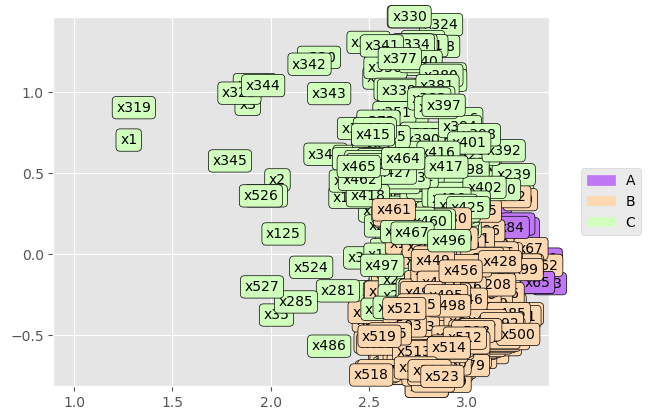

In [120]:
# Plot - Tree Model
util_e_tri_b.plot_points(arr, prediction)

In [116]:
from collections import Counter

# Classification 
counter = Counter(prediction)
for cls, count in counter.items():
    print(f'Class: {cls}, Number of Records: {count}')

Class: 2, Number of Records: 247
Class: 1, Number of Records: 269
Class: 0, Number of Records: 11


In [123]:
# Elicitated Paramneters
w_mean, w_std, q_mean, q_std, p_mean, p_std, v_mean, v_std, b_mean, b_std, cut_mean, cut_std, acc_mean, acc_std = tree_e_tri_b.metrics(models_2, number_of_classes = classes)

print('Criteria Weights: ', np.around(w_mean, decimals = 2))
print('Q: ', np.around(q_mean, decimals = 2))
print('P: ', np.around(p_mean, decimals = 2))
print('V: ', np.around(v_mean, decimals = 2))
for i in range(0, len(b_mean)):
    print('b'+str(i+1)+': ', np.around(b_mean[i], decimals = 2))
    print('Lambda Cutoff: ', round(cut_mean,  2))
    print('Accuracy: ',      round(acc_mean,  2))

Criteria Weights:  [0.48 0.46 0.47 0.59 0.55 0.49 0.51 0.43 0.44 0.48 0.48 0.58 0.46 0.51
 0.44 0.5  0.53 0.4  0.57 0.41 0.52]
Q:  [0.11 0.17 0.18 0.14 0.12 0.1  0.25 0.09 0.26 0.15 0.11 0.1  0.15 0.2
 0.15 0.14 0.25 0.18 0.18 0.15 0.16]
P:  [0.14 0.29 0.25 0.28 0.22 0.16 0.44 0.14 0.38 0.29 0.21 0.19 0.24 0.31
 0.27 0.28 0.35 0.27 0.29 0.28 0.23]
V:  [0.24 0.51 0.41 0.47 0.38 0.28 0.74 0.25 0.62 0.5  0.38 0.34 0.45 0.56
 0.51 0.51 0.56 0.5  0.51 0.52 0.37]
b1:  [0.08 0.4  0.47 0.45 0.52 0.12 0.39 0.11 0.37 0.5  0.6  0.68 0.48 0.47
 0.23 0.55 0.36 0.34 0.51 0.61 0.66]
Lambda Cutoff:  0.66
Accuracy:  0.57
b2:  [0.2  0.69 0.73 0.7  0.78 0.23 0.67 0.26 0.6  0.75 0.77 0.86 0.76 0.74
 0.44 0.73 0.63 0.64 0.73 0.78 0.74]
Lambda Cutoff:  0.66
Accuracy:  0.57


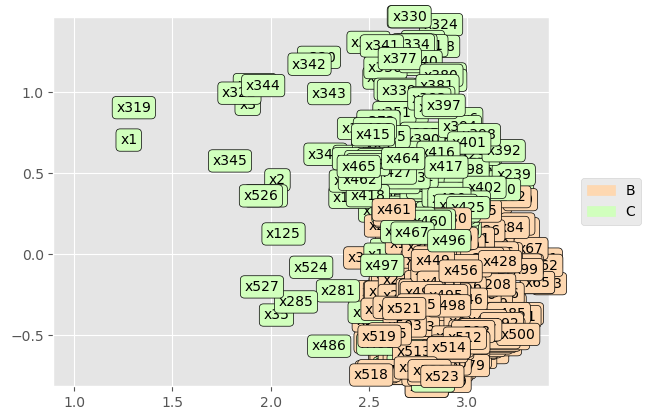

In [118]:
# Plot - Elicitated Parameters
e_tri = util_e_tri_b.electre_tri_b(arr, W = w_mean, Q = q_mean, P = p_mean, V = v_mean,
                                   B = b_mean, cut_level = cut_mean, verbose = False, rule = rule, graph = True) 

In [3]:
df1 = pd.read_csv('/project/grouped_public_large.csv')
df1.head(3)

,Unnamed: 0,geometry,Public WiFi,number of bikes,Mean Inhabitants,Employment,Crime Degree,school_count,Flooding,hospitals_count,...,Suburban Train,Metrobus,Light Rail,Trolleybus,RTP,Raised Trolleybus,Concessioned,e-bike,Cablebus,Total coverage of transport
0,0,POLYGON ((-99.35104183161427 19.29410189579386...,0.0,0.0,0.528,0.0,1.5,4.0,0.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,POLYGON ((-99.35102773494282 19.29602227755663...,1.0,0.0,0.528,0.0,1.5,4.0,0.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,POLYGON ((-99.34950219814468 19.29232325151264...,0.0,0.0,0.000,0.0,0.0,1.0,-1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df1= df1.drop(['geometry','Unnamed: 0'], axis=1)

In [5]:
# Set numerical columns
df_columns_to_normalize = [
 'Public WiFi','number of bikes','Mean Inhabitants','school_count', 'Flooding',
    'hospitals_count', 'Income','Employment','Crime Degree','Deaths','Injuries',
    'Run over','Collision','Metro', 'Suburban Train', 'Concessioned','Metrobus','Trolleybus',
    'RTP','e-bike','Total coverage of transport']

n_scaler = MinMaxScaler()

# Create a copy of DataFrame
df_normalized1 = df1.copy()

df_normalized1[df_columns_to_normalize] = n_scaler.fit_transform(df_normalized1[df_columns_to_normalize])

In [6]:
# Reverse the scale of the minimization criteria by subtracting from 1
minimization_criteria = ['Mean Inhabitants','Crime Degree','Deaths', 'Injuries', 'Run over',
                        'Flooding','Collision']

df_normalized1[minimization_criteria] = 1 - df_normalized1[minimization_criteria]

In [22]:
df_sample = df_normalized1.sample(frac=0.05)


In [23]:
df_sample.shape

(3339, 27)

In [24]:
# Convert to array format

arr1 = df_sample.values
arr1

array([[0.        , 0.        , 0.47960805, ..., 0.        , 0.        ,
        0.16666667],
       [0.        , 0.        , 0.41947249, ..., 0.        , 0.        ,
        0.4047619 ],
       [0.00787402, 0.        , 0.74010898, ..., 0.        , 0.        ,
        0.83333333],
       ...,
       [0.01181102, 0.        , 0.60038971, ..., 0.        , 0.        ,
        0.5       ],
       [0.00787402, 0.        , 0.43717633, ..., 0.        , 0.        ,
        0.33333333],
       [0.01181102, 0.        , 0.36269049, ..., 0.        , 0.        ,
        0.33333333]])

In [25]:
# Parameters - ELECTRE Tree
rule      = 'pc'
classes   = 3
target    = []
Q         = []
P         = []
V         = []
W         = []
B         = []
models    = 50


# Parameters - GA
elite       = 1
eta         = 1
mu          = 2
size        = 15
rate        = 0.01
generations = 150
samples     = 0.25

In [ ]:
# Train Model
models1 = tree_e_tri_b.tree_electre_tri_b(arr1, 
                                         target_assignment = target, 
                                         W = W, 
                                         Q = Q, 
                                         P = P, 
                                         V = V, 
                                         B = B, 
                                         rule = rule, 
                                         number_of_classes = classes, 
                                         elite = elite, 
                                         eta = eta, 
                                         mu = mu, 
                                         mutation_rate = rate, 
                                         generations = generations, 
                                         samples = samples, 
                                         number_of_models = models)

Model # 1
Model # 2
Model # 3
Model # 4
Model # 5
Model # 6
Model # 7
Model # 8
Model # 9
Model # 10
Model # 11
Model # 12
Model # 13
Model # 14
Model # 15
Model # 16
Model # 17
Model # 18
Model # 19
Model # 20
Model # 21
Model # 22
Model # 23
Model # 24
Model # 25
Model # 26
Model # 27
Model # 28
Model # 29
Model # 30
Model # 31
Model # 32
Model # 33
Model # 34
Model # 35
Model # 36
Model # 37
Model # 38
Model # 39
Model # 40
Model # 41
Model # 42
Model # 43
Model # 44
Model # 45


In [17]:
prediction, solutions = tree_e_tri_b.predict(models1, arr1, verbose = False, rule = 'pc')

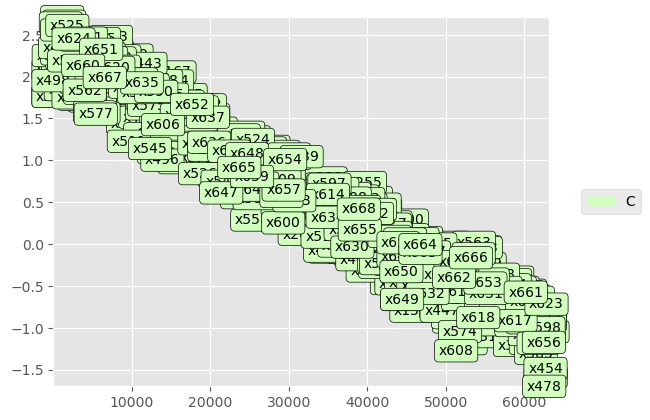

In [18]:
# Plot - Tree Model
util_e_tri_b.plot_points(arr1, prediction)